In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adhurimquku/ford-car-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ford-car-price-prediction' dataset.
Path to dataset files: /kaggle/input/ford-car-price-prediction


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(os.path.join(path, "ford.csv"))
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2003       3
2002       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64


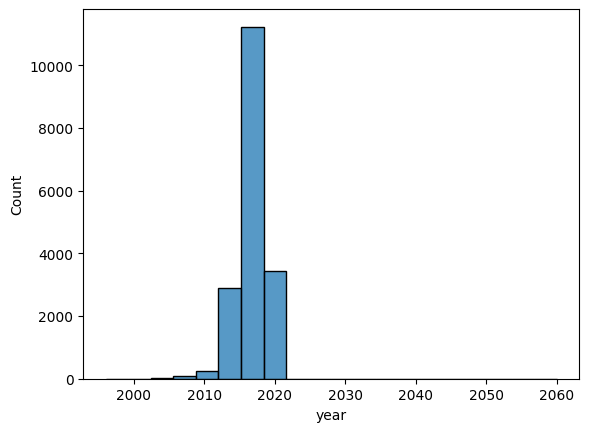

In [ ]:
# Year is one hot encoding
print(df["year"].value_counts())

sns.histplot(df["year"], bins=20)
plt.show()

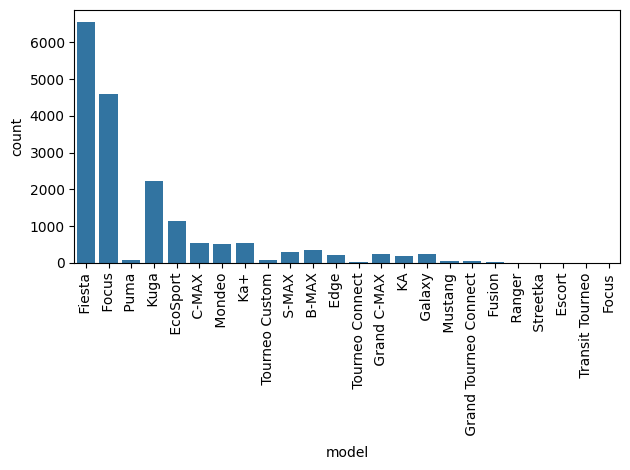

In [ ]:
# Model - one hot encoding

df["model"].value_counts()

sns.countplot(x=df["model"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Difference:**

* **Count plot**: counts **categorical values**. X = categories, Y = frequency. Used for columns like `transmission`, `fuelType`.
* **Histogram**: bins **continuous numeric data**. X = value ranges, Y = frequency. Used for columns like `year`, `price`.

Count plot shows exact category counts. Histogram groups numbers into bins.


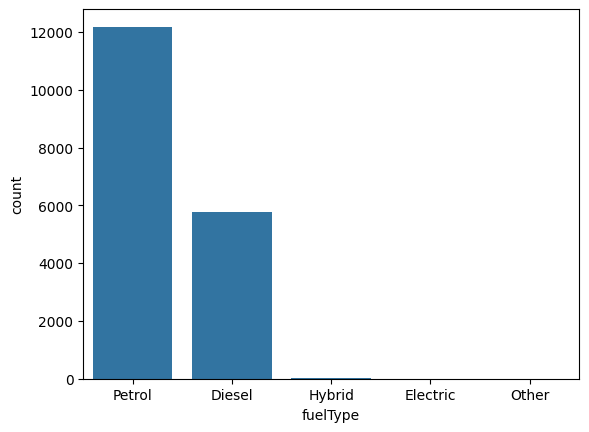

In [ ]:
# fuel type - one hot encoding

df["fuelType"].value_counts()

sns.countplot(x=df["fuelType"])
plt.show()

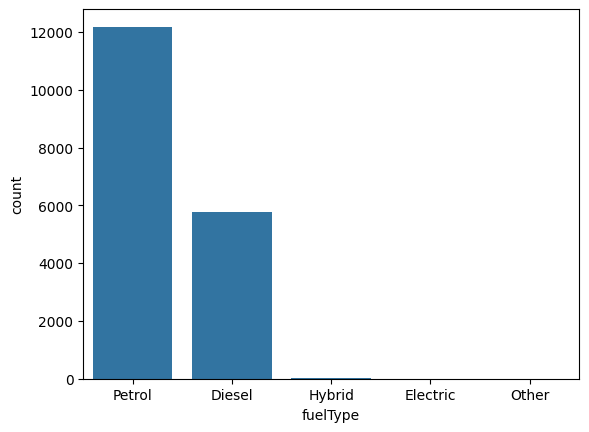

In [ ]:
# Model - one hot encoding

df["fuelType"].value_counts()

sns.countplot(x=df["fuelType"])
plt.show()

In [ ]:
xDf = df.drop(columns=["price"])
yDf = df["price"]

In [ ]:
xDf = pd.get_dummies(xDf, columns=[
    "transmission",
    "fuelType",
    "year",
    "model"
])

xDf = xDf.astype("int")
xDf.head()

,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,15944,150,57,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9083,150,57,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12456,150,57,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10460,145,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1482,145,48,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xDf[["mileage", "tax", "mpg"]] = scaler.fit_transform(
    xDf[["mileage", "tax", "mpg"]]
)

xDf.head()

,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,-0.380998,0.591358,-0.042122,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.733359,0.591358,-0.042122,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.560132,0.591358,-0.042122,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.662640,0.510727,-1.721198,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.123724,0.510727,-0.931045,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_test.head()

,price
17610,6995
7076,8999
1713,7998
1611,5491
16830,3790


In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.8762290482005992

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1- r2) * (n-1) / (n - p - 1))
adjusted_r2

0.8741626967132861